# Evaluating a trained agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np

from IPython.display import clear_output

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
PATH = "C:/Users/Gebruiker/Documents/Coding 2019/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe"

In [4]:
env = UnityEnvironment(file_name=PATH, no_graphics = False)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [6]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [7]:
from agent import Agent

In [8]:
agent = Agent(state_size, action_size, num_agents)

In [9]:
agent.load("model1")

In [10]:
rewards = []
for episode in range(100):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations
    scores = np.zeros(num_agents)
    while 1:
            action = agent.get_action(state)
            action = np.clip(action, -1, 1)  
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            state = next_state
            scores += env_info.rewards                         # update the score (for each agent)
            if True in done:
                rewards.append(np.max(scores))
                clear_output()
                print("episode {0:3} / 100".format(episode))
                break

episode  99 / 100


In [11]:
env.close()

<BarContainer object of 100 artists>

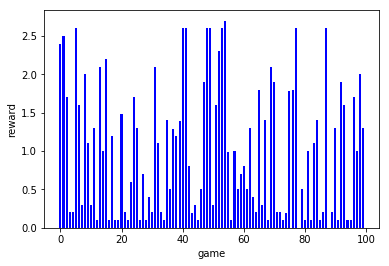

In [12]:
y = rewards
x = range(len(y))
plt.ylabel('reward')
plt.xlabel('game')
width = 1/1.5
plt.bar(x, y, width, color="blue")

In [13]:
print("Average reward: {0}".format(sum(rewards)/ len(rewards)))

Average reward: 1.0233000153116882
